# Numeros Aleatorios

In [1]:
import random as rnd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 10)
from itertools import cycle

## Generador de congruencia lineal

In [2]:
def genera_secuencia(m, a, c, seed, count, full=True, check=True):
    seq = []
    xn = seed

    if check:
        if m < 0 or a >= m or a <= 0 or c >= m or c < 0:
            return None

    if full:
        if mcd(c, m) != 1 or not divisib_fact_primos(a-1, m) or not ((a - 1) % 4 == 0 and m % 4 == 0):
            return None

    generador = lcg(m, a, c, seed)

    for i in range(count):
        seq.append(generador.__next__())

    return seq


def lcg(m, a, c, seed):
    _xn = seed

    while True:
        yield _xn
        _xn = (a * _xn + c) % m


def mcd(a, b):
    while b != 0:
        resto = a % b
        a = b
        b = resto

    return a


def factores_primos(n):
    fatt = []
    d = 2

    while d*d <= n:
        while n % d == 0:
            fatt.append(d)
            n /= d
        d += 1

    if n > 1:
        fatt.append(n)

    return fatt


def divisib_fact_primos(a, b):
    fatt_primi = factores_primos(b)

    for i in fatt_primi:
        if a % i != 0:
            return False

    return True

## Algunas gráficas del generador

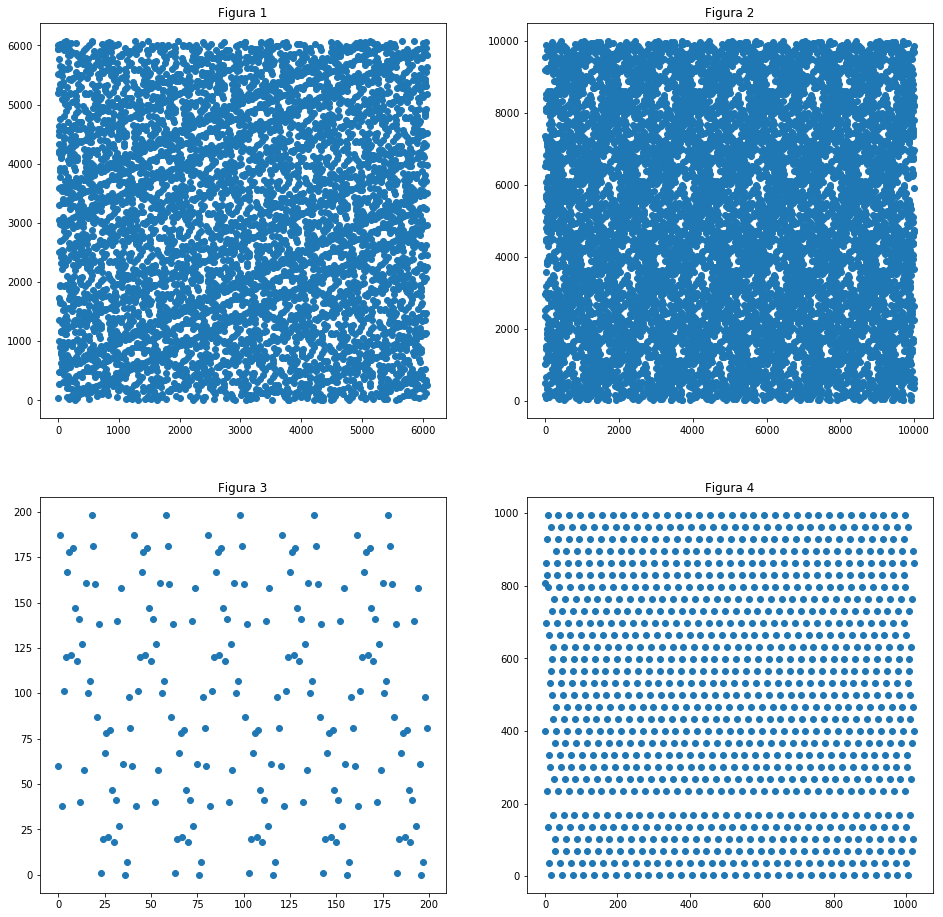

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Figura 1
m = 6075
a = 106
c = 1283
seed = rnd.randint(0, m - 1)
numeros_generados = genera_secuencia(m, a, c, seed, count=m, full=False, check=False)
t = np.arange(0, len(numeros_generados))
axes[0,0].set_title("Figura 1")
axes[0,0].scatter(t, numeros_generados)

# Figura 2
m = 10000
a = 17
c = 43
seed = rnd.randint(0, m - 1)
numeros_generados = genera_secuencia(m, a, c, seed, count=m, full=False, check=False)
t = np.arange(0, len(numeros_generados))
axes[0,1].set_title("Figura 2")
axes[0,1].scatter(t, numeros_generados)

# Figura 3
m = 200
a = 13
c = 7
seed = rnd.randint(0, m - 1)
numeros_generados = genera_secuencia(m, a, c, seed, count=m, full=False, check=False)
t = np.arange(0, len(numeros_generados))
axes[1,0].set_title("Figura 3")
axes[1,0].scatter(t, numeros_generados)

# Figura 4
m = 2**10-1
a = 40014
c = 97
seed = rnd.randint(0, m - 1)
numeros_generados = genera_secuencia(m, a, c, seed, count=m, full=False, check=False)
t = np.arange(0, len(numeros_generados))
axes[1,1].set_title("Figura 4")
axes[1,1].scatter(t, numeros_generados)